In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
print("✅ Libraries loaded")

Matplotlib is building the font cache; this may take a moment.


✅ Libraries loaded


In [2]:
df = pd.read_csv('../data/churn.csv')
print(df.shape)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.info())
print(df['Churn'].value_counts(normalize=True)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


/var/folders/q1/s2k7ll_15rj8qj2xs81dm0pc0000gn/T/ipykernel_30374/481987240.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


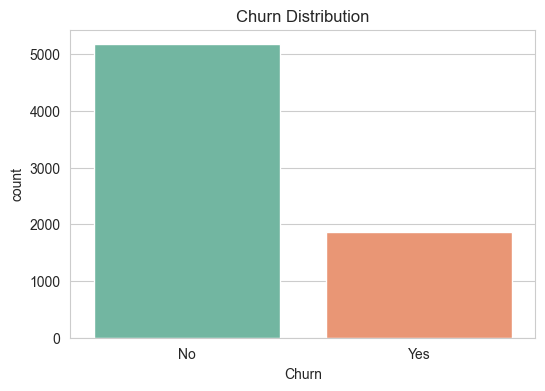

In [4]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution'); plt.show()

In [5]:
# numeric features
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
df.drop(columns=['customerID'], inplace=True)
df['Churn'] = df['Churn'].map({'Yes':1,'No':0})
print("✅ Cleaned & target encoded")

✅ Cleaned & target encoded


/var/folders/q1/s2k7ll_15rj8qj2xs81dm0pc0000gn/T/ipykernel_30374/3625022367.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoders={}
for col in df.select_dtypes('object').columns:
    le=LabelEncoder()
    df[col]=le.fit_transform(df[col])
    label_encoders[col]=le
print("✅ Encoded categoricals")

✅ Encoded categoricals


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X=df.drop('Churn',axis=1)
y=df['Churn']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

scaler=StandardScaler()
X_train_s=scaler.fit_transform(X_train)
X_test_s=scaler.transform(X_test)
print("✅ Split & scaled")

✅ Split & scaled


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

lr=LogisticRegression(max_iter=1000,random_state=42)
rf=RandomForestClassifier(n_estimators=100,max_depth=10,random_state=42)

for name,model in {'LR':lr,'RF':rf}.items():
    model.fit(X_train_s,y_train)
    pred=model.predict(X_test_s)
    print(f"\n=== {name} ===")
    print(f"Acc:{accuracy_score(y_test,pred):.3f}  F1:{f1_score(y_test,pred):.3f}")


=== LR ===
Acc:0.799  F1:0.592

=== RF ===
Acc:0.797  F1:0.571


In [9]:
import joblib, os

os.makedirs('../models', exist_ok=True)

best_model = lr        # change to rf if yours was better
joblib.dump(best_model, '../models/model.pkl')
print("✅ Model saved as models/model.pkl")

joblib.dump(scaler, '../models/scaler.pkl')
joblib.dump(X.columns.tolist(), '../models/feature_names.pkl')
joblib.dump(label_encoders, '../models/label_encoders.pkl')
print("✅ Scaler, feature names & encoders saved!")

✅ Model saved as models/model.pkl
✅ Scaler, feature names & encoders saved!


In [10]:
import joblib
import numpy as np

loaded_model = joblib.load('../models/model.pkl')
loaded_scaler = joblib.load('../models/scaler.pkl')

sample = X_test.iloc[0:1]                 # one row from the test set
sample_scaled = loaded_scaler.transform(sample)
pred = loaded_model.predict(sample_scaled)
proba = loaded_model.predict_proba(sample_scaled)

print("reload ok")
print("prediction:", int(pred[0]))
print("probability:", proba[0].tolist())

reload ok
prediction: 0
probability: [0.954820117346292, 0.04517988265370797]
